# Set Covering Problem

## Description

This notebook is designed to understand the Set Covering Problem (SCP). The SCP is a classical optimization problem where the goal is to cover all elements of a given set with the minimum number of subsets. 

In this notebook, we will:
1. Explain the Set Covering Problem.
2. Show how to model the SCP using mathematical formulations.
3. Provide an example and solve it using the PULP library in Python.

## Definition

The Set Covering Problem (SCP) can be formally defined as follows:

Given:
- A universal set $ U $ of $ n $ elements, $ U = \{ e_1, e_2, \ldots, e_n \} $.
- A collection of $ m $ subsets $ S = \{ S_1, S_2, \ldots, S_m \} $ such that each subset $ S_i \subseteq U $.

Objective:
- Find a minimum cardinality subset $ C \subseteq S $ such that the union of the subsets in $ C $ covers all elements in $ U $.

Mathematically, the problem can be formulated as:

Minimize $ |C| $

Subject to:
$$ \bigcup_{S_i \in C} S_i = U $$

where $ C \subseteq S $.

## Motivation

### Practical Applications

The Set Covering Problem has numerous practical applications in various fields, including:

1. **Telecommunications**: Designing efficient communication networks where the goal is to place the minimum number of transmitters to cover a given area.
2. **Healthcare**: Optimizing the location of hospitals or clinics to ensure that all regions have access to medical services.
3. **Logistics**: Determining the minimum number of warehouses needed to supply a set of retail stores.
4. **Manufacturing**: Minimizing the number of machines required to perform a set of tasks in a production process.
5. **Security**: Placing the minimum number of security cameras to cover all areas of a building or facility.

### Scientific Importance

The SCP is not only important for its practical applications but also for its scientific significance:

1. **Complexity Theory**: The SCP is an NP-hard problem, making it a central topic in the study of computational complexity and optimization.
2. **Algorithm Development**: Solving the SCP has led to the development of various algorithms, including greedy algorithms, approximation algorithms, and integer programming techniques.
3. **Operations Research**: The SCP is a fundamental problem in operations research, with applications in resource allocation, scheduling, and network design.
4. **Mathematical Modeling**: The SCP provides a framework for modeling and solving a wide range of real-world optimization problems.
5. **Modeling Complex Problems**: The SCP can be used as a subproblem in more complex optimization problems, such as vehicle routing and crew scheduling.
6. **Column Generation**: The SCP is often used in column generation techniques for solving large-scale linear programming problems, where it helps in generating new columns (variables) to improve the solution iteratively.

## An Illustrative Example

To illustrate the Set Covering Problem, let's consider a simple example. Suppose we have a universal set $ U $ of 6 elements and a collection of 4 subsets. Our goal is to cover all elements in $ U $ with the minimum number of subsets.

The universal set $ U $ and the subsets $ S $ are defined as follows:

- Universal set $ U = \{ 1, 2, 3, 4, 5, 6 \} $
- Subsets:
    - $ S_1 = \{ 1, 2, 3 \} $
    - $ S_2 = \{ 2, 4 \} $
    - $ S_3 = \{ 3, 4, 5 \} $
    - $ S_4 = \{ 4, 5, 6 \} $

We can store this data in a CSV file named `assets/scp_example.csv` with the following content:

```
Subset,Elements
S1,"1,2,3"
S2,"2,4"
S3,"3,4,5"
S4,"4,5,6"
```

### The Model

We can model this illustrative example using the following steps:

1. **Define the Decision Variables**:
    Let $ x_i $ be a binary decision variable that is 1 if subset $ S_i $ is selected, and 0 otherwise.

2. **Objective Function**:
    Minimize the total number of subsets selected:
    $$ \text{Minimize} \sum_{i=1}^{4} x_i $$

3. **Constraints**:
    Ensure that every element in the universal set $ U $ is covered by at least one selected subset:
    $$ x_1  \geq 1 \quad \text{(for element 1)} $$
    $$ x_1 + x_2 \geq 1 \quad \text{(for element 2)} $$
    $$ x_1 + x_3 \geq 1 \quad \text{(for element 3)} $$
    $$ x_2 + x_3 + x_4 \geq 1 \quad \text{(for element 4)} $$
    $$ x_3 + x_4 \geq 1 \quad \text{(for element 5)} $$
    $$ x_4 \geq 1 \quad \text{(for element 6)} $$
    
4. **Nature of the Variables**:
        $$ x_i \in \{0, 1\} \quad \text{for all } i\in {1,\dots,4} $$
    

In the next cells, we will read this CSV file and solve the Set Covering Problem using the PULP library.

### Setting the Environment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pulp as pl

### Modeling with PULP

In [3]:
# Read the CSV file
df = pd.read_csv('scp_example.csv')
df['Elements'] = df['Elements'].apply(lambda x: list(map(int, x.split(','))))

# Define the universal set U and the subsets S
U = {1, 2, 3, 4, 5, 6}
S = {row['Subset']: set(row['Elements']) for _, row in df.iterrows()}

# Create a PULP problem instance
prob = pl.LpProblem("Set_Covering_Problem", pl.LpMinimize)

# Define the decision variables
x = pl.LpVariable.dicts('x', S.keys(), cat=pl.LpBinary)

# Objective function: Minimize the total number of subsets selected
prob += pl.lpSum(x[i] for i in S.keys()), "Minimize_Subsets"

# Constraints: Ensure that every element in the universal set U is covered by at least one selected subset
for e in U:
    prob += pl.lpSum(x[i] for i in S.keys() if e in S[i]) >= 1, f"Cover_element_{e}"
    
# Print the problem
print(prob)

# Solve the problem
prob.solve()

# Print the results
print("Status:", pl.LpStatus[prob.status])
Selected_Subsets = []
for i in S.keys():
    if x[i].varValue == 1:
        Selected_Subsets.append(i)

print("Selected Subsets:", Selected_Subsets)



Set_Covering_Problem:
MINIMIZE
1*x_S1 + 1*x_S2 + 1*x_S3 + 1*x_S4 + 0.0
SUBJECT TO
Cover_element_1: x_S1 >= 1

Cover_element_2: x_S1 + x_S2 >= 1

Cover_element_3: x_S1 + x_S3 >= 1

Cover_element_4: x_S2 + x_S3 + x_S4 >= 1

Cover_element_5: x_S3 + x_S4 >= 1

Cover_element_6: x_S4 >= 1

VARIABLES
0 <= x_S1 <= 1 Integer
0 <= x_S2 <= 1 Integer
0 <= x_S3 <= 1 Integer
0 <= x_S4 <= 1 Integer

Status: Optimal
Selected Subsets: ['S1', 'S4']


### Visualizing the Cover

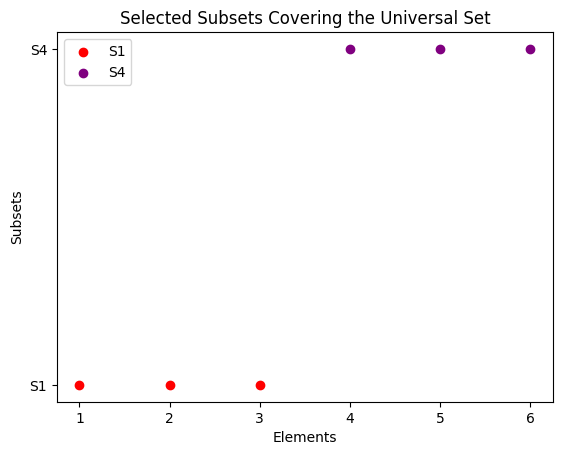

In [4]:
# Plot the solution to visualize the sets
fig, ax = plt.subplots()

# Define colors for the subsets
colors = {'S1': 'red', 'S2': 'blue', 'S3': 'green', 'S4': 'purple'}

# Plot each subset
for subset in Selected_Subsets:
    elements = list(S[subset])
    ax.scatter(elements, [subset] * len(elements), color=colors[subset], label=subset)

# Add labels and title
ax.set_xlabel('Elements')
ax.set_ylabel('Subsets')
ax.set_title('Selected Subsets Covering the Universal Set')
ax.legend()

# Show the plot
plt.show()

## Practice exercise

To further understand the Set Covering Problem, try to model and solve the following example. Suppose we have a universal set $ U $ of 8 elements and a collection of 5 subsets. Our goal is to cover all elements in $ U $ with the minimum number of subsets.

The universal set $ U $ and the subsets $ S $ are defined as follows:

- Universal set $ U = \{ 1, 2, 3, 4, 5, 6, 7, 8 \} $
- Subsets:
    - $ S_1 = \{ 1, 2, 3 \} $
    - $ S_2 = \{ 2, 4, 5 \} $
    - $ S_3 = \{ 3, 6 \} $
    - $ S_4 = \{ 4, 5, 7 \} $
    - $ S_5 = \{ 6, 7, 8 \} $

The data are stored in the CSV file named `assets/scp_practice.csv`.

1. **Model**: Propose a mathematical formulation of the problem
2. **Solution**: Implement the model in PULP and solve it



### The Model

We can model this exercise as 

1. **Define the Decision Variables**:
    Let $ x_i $ be a binary decision variable that is 1 if subset $ S_i $ is selected, and 0 otherwise.

2. **Objective Function**:
    Minimize the total number of subsets selected:
    $$ \text{Minimize} \sum_{i=1}^{5} x_i $$

3. **Constraints**:
    Ensure that every element in the universal set $ U $ is covered by at least one selected subset:
    $$ x_1  \geq 1 \quad \text{(for element 1)} $$
    $$ x_1 + x_2 \geq 1 \quad \text{(for element 2)} $$
    $$ x_1 + x_3 \geq 1 \quad \text{(for element 3)} $$
    $$ x_2 +  x_4 \geq 1 \quad \text{(for element 4)} $$
    $$ x_2 + x_4 \geq 1 \quad \text{(for element 5)} $$
    $$ x_3 + x_5 \geq 1 \quad \text{(for element 6)} $$
    $$ x_4 + x_5 \geq 1 \quad \text{(for element 7)} $$
    $$ x_5 \geq 1 \quad \text{(for element 8)} $$
    
4. **Nature of the Variables**:
        $$ x_i \in \{0, 1\} \quad \text{for all } i\in {1,\dots,5} $$

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import pulp as pl

# Read the CSV file
df = pd.read_csv('scp_practice.csv')
df['Elements'] = df['Elements'].apply(lambda x: list(map(int, x.split(','))))

# Define the universal set U and the subsets S
U = {1, 2, 3, 4, 5, 6,7,8}
S = {row['Subset']: set(row['Elements']) for _, row in df.iterrows()}

# Create a PULP problem instance
prob = pl.LpProblem("Set_Covering_Problem", pl.LpMinimize)

# Define the decision variables
x = pl.LpVariable.dicts('x', S.keys(), cat=pl.LpBinary)

# Objective function: Minimize the total number of subsets selected
prob += pl.lpSum(x[i] for i in S.keys()), "Minimize_Subsets"

# Constraints: Ensure that every element in the universal set U is covered by at least one selected subset
for e in U:
    prob += pl.lpSum(x[i] for i in S.keys() if e in S[i]) >= 1, f"Cover_element_{e}"
    
# Print the problem
print(prob)

# Solve the problem
prob.solve()

# Print the results
print("Status:", pl.LpStatus[prob.status])
Selected_Subsets = []
for i in S.keys():
    if x[i].varValue == 1:
        Selected_Subsets.append(i)

print("Selected Subsets:", Selected_Subsets)

Set_Covering_Problem:
MINIMIZE
1*x_S1 + 1*x_S2 + 1*x_S3 + 1*x_S4 + 1*x_S5 + 0.0
SUBJECT TO
Cover_element_1: x_S1 >= 1

Cover_element_2: x_S1 + x_S2 >= 1

Cover_element_3: x_S1 + x_S3 >= 1

Cover_element_4: x_S2 + x_S4 >= 1

Cover_element_5: x_S2 + x_S4 >= 1

Cover_element_6: x_S3 + x_S5 >= 1

Cover_element_7: x_S4 + x_S5 >= 1

Cover_element_8: x_S5 >= 1

VARIABLES
0 <= x_S1 <= 1 Integer
0 <= x_S2 <= 1 Integer
0 <= x_S3 <= 1 Integer
0 <= x_S4 <= 1 Integer
0 <= x_S5 <= 1 Integer

Status: Optimal
Selected Subsets: ['S1', 'S2', 'S5']


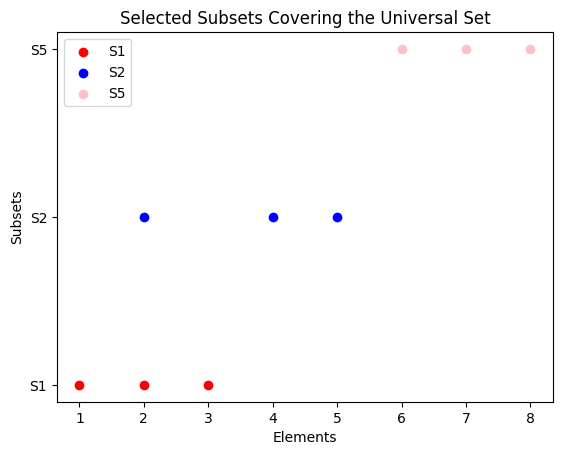

In [13]:
# Plot the solution to visualize the sets
fig, ax = plt.subplots()

# Define colors for the subsets
colors = {'S1': 'red', 'S2': 'blue', 'S3': 'green', 'S4': 'purple', 'S5': 'pink'}

# Plot each subset
for subset in Selected_Subsets:
    elements = list(S[subset])
    ax.scatter(elements, [subset] * len(elements), color=colors[subset], label=subset)

# Add labels and title
ax.set_xlabel('Elements')
ax.set_ylabel('Subsets')
ax.set_title('Selected Subsets Covering the Universal Set')
ax.legend()

# Show the plot
plt.show()

3. **Bonus**: Modify the model to now minimize the cost of the decision where each set has the following cost:
    - $ S_1 : 20 $
    - $ S_2 : 35 $
    - $ S_3 : 20 $
    - $ S_4 : 50 $
    - $ S_5 : 10 $


It is required to change the model

1. **Define the Decision Variables**:
    Let $ x_i $ be a binary decision variable that is 1 if subset $ S_i $ is selected, and 0 otherwise. Also, $ c_i $ will be the cost of the subset

2. **Objective Function**:
    Minimize the total number of subsets selected:
    $$ \text{Minimize} \sum_{i=1}^{5} c_i  x_i $$

3. **Constraints**:
    Ensure that every element in the universal set $ U $ is covered by at least one selected subset:
    $$ x_1  \geq 1 \quad \text{(for element 1)} $$
    $$ x_1 + x_2 \geq 1 \quad \text{(for element 2)} $$
    $$ x_1 + x_3 \geq 1 \quad \text{(for element 3)} $$
    $$ x_2 +  x_4 \geq 1 \quad \text{(for element 4)} $$
    $$ x_2 + x_4 \geq 1 \quad \text{(for element 5)} $$
    $$ x_3 + x_5 \geq 1 \quad \text{(for element 6)} $$
    $$ x_4 + x_5 \geq 1 \quad \text{(for element 7)} $$
    $$ x_5 \geq 1 \quad \text{(for element 8)} $$
    
4. **Nature of the Variables**:
        $$ x_i \in \{0, 1\} \quad \text{for all } i\in {1,\dots,5} $$

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import pulp as pl

# Read the CSV file
df = pd.read_csv('scp_practice.csv')
df['Elements'] = df['Elements'].apply(lambda x: list(map(int, x.split(','))))
df['Cost'] = [20, 35, 20, 50, 10] # S1=20, S2=35, S3=20, S4=50, S5=10

c = df['Cost']

print("The data frame is: ")
print(df)

# Define the universal set U and the subsets S
U = {1, 2, 3, 4, 5, 6,7,8}
S = {row['Subset']: set(row['Elements']) for _, row in df.iterrows()}

# Create a PULP problem instance
prob = pl.LpProblem("Set_Covering_Problem", pl.LpMinimize)

# Define the decision variables
x = pl.LpVariable.dicts('x', S.keys(), cat=pl.LpBinary)


# Objective function: Minimize the total number of subsets selected
prob += pl.lpSum(c[i] * x[subset] for i, subset in enumerate(S.keys())), "Minimize_Subsets"

# Constraints: Ensure that every element in the universal set U is covered by at least one selected subset
for e in U:
    prob += pl.lpSum(x[i] for i in S.keys() if e in S[i]) >= 1, f"Cover_element_{e}"
    
# Print the problem
print(prob)

# Solve the problem
prob.solve()

# Print the results
print("Status:", pl.LpStatus[prob.status])
Selected_Subsets = []
for i in S.keys():
    if x[i].varValue == 1:
        Selected_Subsets.append(i)

print("Selected Subsets:", Selected_Subsets)

The data frame is: 
  Subset   Elements  Cost
0     S1  [1, 2, 3]    20
1     S2  [2, 4, 5]    35
2     S3     [3, 6]    20
3     S4  [4, 5, 7]    50
4     S5  [6, 7, 8]    10
Set_Covering_Problem:
MINIMIZE
20*x_S1 + 35*x_S2 + 20*x_S3 + 50*x_S4 + 10*x_S5 + 0.0
SUBJECT TO
Cover_element_1: x_S1 >= 1

Cover_element_2: x_S1 + x_S2 >= 1

Cover_element_3: x_S1 + x_S3 >= 1

Cover_element_4: x_S2 + x_S4 >= 1

Cover_element_5: x_S2 + x_S4 >= 1

Cover_element_6: x_S3 + x_S5 >= 1

Cover_element_7: x_S4 + x_S5 >= 1

Cover_element_8: x_S5 >= 1

VARIABLES
0 <= x_S1 <= 1 Integer
0 <= x_S2 <= 1 Integer
0 <= x_S3 <= 1 Integer
0 <= x_S4 <= 1 Integer
0 <= x_S5 <= 1 Integer

Status: Optimal
Selected Subsets: ['S1', 'S2', 'S5']


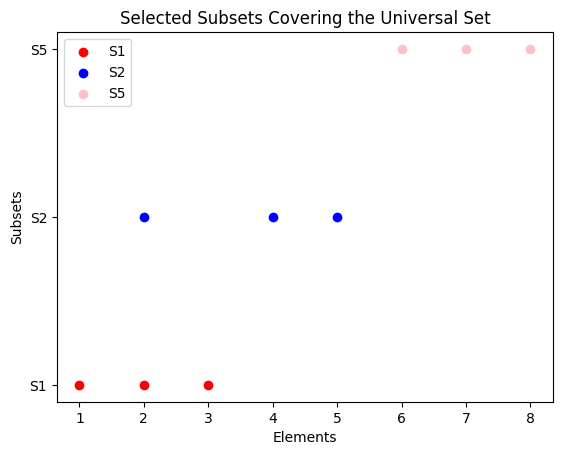

In [15]:
# Plot the solution to visualize the sets
fig, ax = plt.subplots()

# Define colors for the subsets
colors = {'S1': 'red', 'S2': 'blue', 'S3': 'green', 'S4': 'purple', 'S5': 'pink'}

# Plot each subset
for subset in Selected_Subsets:
    elements = list(S[subset])
    ax.scatter(elements, [subset] * len(elements), color=colors[subset], label=subset)

# Add labels and title
ax.set_xlabel('Elements')
ax.set_ylabel('Subsets')
ax.set_title('Selected Subsets Covering the Universal Set')
ax.legend()

# Show the plot
plt.show()

## Conclusion

In this notebook, we explored the Set Covering Problem (SCP), a fundamental optimization problem with numerous practical applications. We started by defining the SCP and discussing its significance in various fields. We then provided an illustrative example and demonstrated how to model and solve the SCP using the PULP library in Python. Additionally, we visualized the solution to better understand the selected subsets. Finally, we provided a practice exercise to reinforce the concepts learned. Through this notebook, we gained insights into the SCP's complexity and the techniques used to address it, highlighting its importance in both theoretical and practical contexts.